In [17]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from functions import *

## Load data

In [14]:
# load data, 
# not using a cleaning function
# dropping ingredients used in less than 0.00013 recipies

X, y, features = get_design_matrix(min_df = 0.00013)

print("There are %d recipies and %d feautres" % (X.shape[0], len(features)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# The set of different cuisines
data = pd.read_json('train.json')
cuisines = data.cuisine.unique()

There are 39774 recipies and 1781 feautres


## Make confusion matrices

In [30]:
forrest_clf = RandomForestClassifier(n_estimators = 100, max_depth = None)
forrest_clf.fit(x_train, y_train)
forrest_predictions = forrest_clf.predict(x_test)
forrest_confusion = confusion_matrix(y_test, forrest_predictions, labels = cuisines)

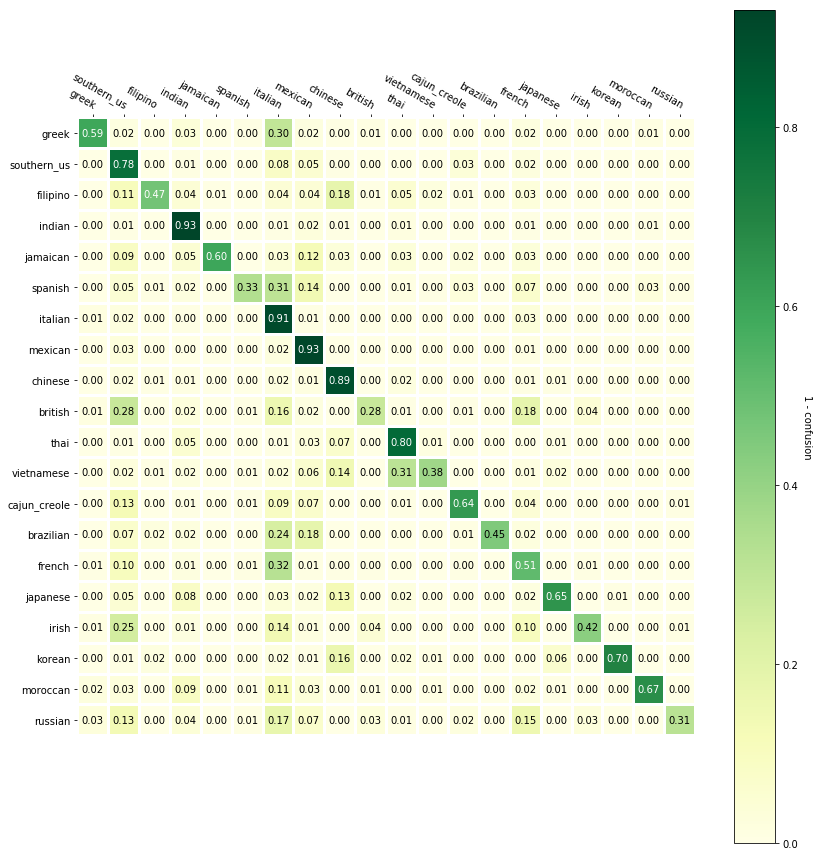

In [29]:
# make plot
fig, ax = plt.subplots(figsize=(12, 12))
im, cbar = heatmap((forrest_confusion.T/forrest_confusion.sum(axis=1)).T, cuisines, cuisines, ax = ax, cmap = "YlGn", cbarlabel = '1 - confusion' )
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
plt.show()

In [23]:
print(classification_report(y_test, forrest_predictions, labels=cuisines, target_names=cuisines))


              precision    recall  f1-score   support

       greek       0.77      0.59      0.67       235
 southern_us       0.65      0.78      0.71       838
    filipino       0.74      0.49      0.59       148
      indian       0.83      0.93      0.88       595
    jamaican       0.94      0.61      0.74        99
     spanish       0.80      0.31      0.45       212
     italian       0.70      0.90      0.79      1504
     mexican       0.86      0.93      0.89      1315
     chinese       0.76      0.88      0.82       562
     british       0.76      0.27      0.40       173
        thai       0.71      0.81      0.76       277
  vietnamese       0.85      0.40      0.55       168
cajun_creole       0.80      0.62      0.70       330
   brazilian       0.85      0.44      0.58       105
      french       0.60      0.52      0.55       547
    japanese       0.87      0.64      0.74       295
       irish       0.71      0.40      0.51       137
      korean       0.94    

In [31]:
svm_clf =  svm.LinearSVC(C = 0.1)
svm_clf.fit(x_train, y_train)
svm_predictions = svm_clf.predict(x_test)
svm_confusion = confusion_matrix(y_test, svm_predictions, labels = cuisines)

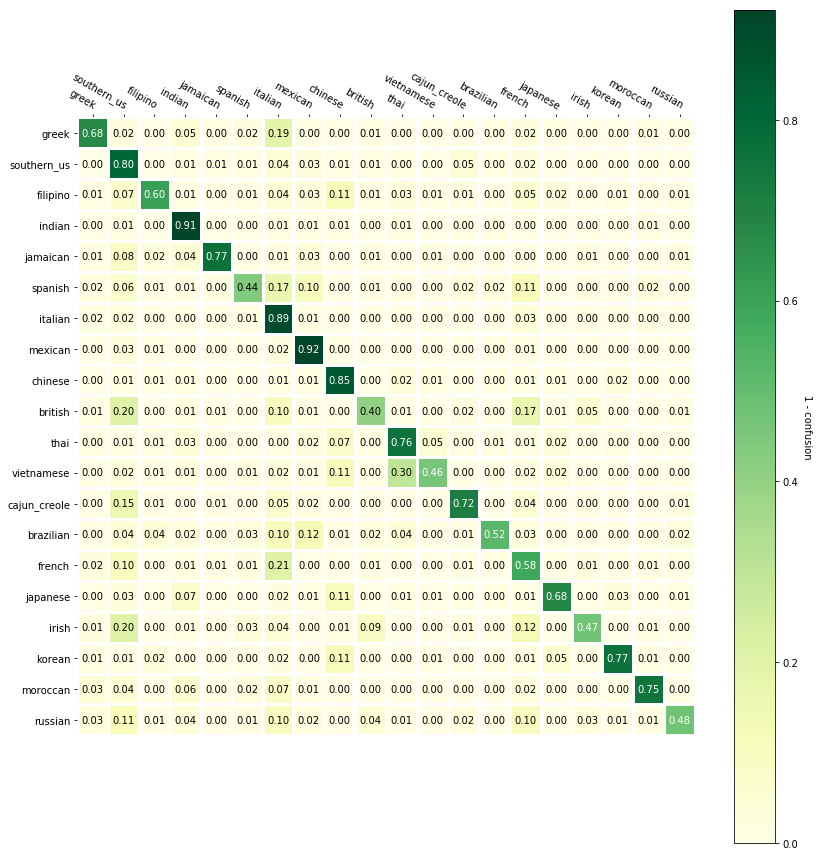

In [32]:
# make plot
fig, ax = plt.subplots(figsize=(12, 12))
im, cbar = heatmap((svm_confusion.T/svm_confusion.sum(axis=1)).T, cuisines, cuisines, ax = ax, cmap = "YlGn", cbarlabel = '1 - confusion' )
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
plt.show()